In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.plotting.backend = 'plotly'   # Configura os gráficos como plotly

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv


# Data Exploration

In [2]:
data = pd.read_csv('../input/tweet-sentiment-extraction/train.csv')
data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
print(f'Os dados possuem {data.shape[0]} linhas e {data.shape[1]} colunas')
print(f'Os dados possuem {data.isna().sum().sum()} valores nulos')

Os dados possuem 27481 linhas e 4 colunas
Os dados possuem 2 valores nulos


In [5]:
data[['sentiment']]

,sentiment
0,neutral
1,negative
2,negative
3,negative
4,negative
...,...
27476,negative
27477,negative
27478,positive
27479,positive


In [6]:
sentiments = data.sentiment.str.split(expand=True).stack().value_counts()
sentiments

neutral     11118
positive     8582
negative     7781
dtype: int64

In [7]:
data.sentiment.hist(xrot='Sentiment', yrot='Quantity')

# Separação dos Sentimentos

In [8]:
# Seleção dos dados classificados como neutros
selecao_neutros = data['sentiment'] == 'neutral'
neutros = data[selecao_neutros]
neutros

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
10,2339a9b08b,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral
...,...,...,...,...
27468,a753a93e45,"few grilled mushrooms and olives, feta cheese ...","few grilled mushrooms and olives, feta cheese ...",neutral
27469,ac92790d8b,94 more days till BH comes back to LA,94 more days till BH comes back to LA,neutral
27471,15bb120f57,"i`m defying gravity. and nobody in alll of oz,...","i`m defying gravity. and nobody in alll of oz,...",neutral
27473,a208770a32,in spoke to you yesterday and u didnt respond...,in spoke to you yesterday and u didnt respond ...,neutral


In [9]:
# Seleção dos dados classificados como negativos
negativos = data.query('sentiment == "negative"')
negativos

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,DANGERously,negative
...,...,...,...,...
27464,e7eecffdc8,rec game....trying not to cry...the pain is to...,breakingg,negative
27470,778184dff1,lol i know and haha..did you fall asleep?? o...,t bored,negative
27472,8f5adc47ec,http://twitpic.com/663vr - Wanted to visit the...,were too late,negative
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative


In [10]:
# Seleção dos dados classificados como positivos
selecao_positivos = data['sentiment'] == 'positive'
positivos = data[selecao_positivos]
positivos

,textID,text,selected_text,sentiment
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive
11,16fab9f95b,I really really like the song Love Story by Ta...,like,positive
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive
...,...,...,...,...
27467,432e6de6c9,morning twit-friends! welcome to my new followers,welcome,positive
27474,8f14bb2715,So I get up early and I feel good about the da...,I feel good ab,positive
27475,b78ec00df5,enjoy ur night,enjoy,positive
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive


# Tratamento de Texto Categórico

In [11]:
data_ref = data.copy()

In [12]:
data_ref = data_ref.replace(',', ' ', regex=True)

In [13]:
from sklearn import preprocessing

In [14]:
ohe = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(data_ref[['sentiment']])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [15]:
ohe.get_feature_names(['sentiment'])

array(['sentiment_negative', 'sentiment_neutral', 'sentiment_positive'],
      dtype=object)

In [16]:
# Retorna um Array (Matriz) com uma coluna numérica para cada sentimento
X = ohe.transform(data_ref[['sentiment']])

data_numerico = pd.DataFrame(X, columns=ohe.get_feature_names(['sentiment']))
data_numerico

,sentiment_negative,sentiment_neutral,sentiment_positive
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
27476,1.0,0.0,0.0
27477,1.0,0.0,0.0
27478,0.0,0.0,1.0
27479,0.0,0.0,1.0


### Deletando a Coluna Texto

In [17]:
data_ref = data_ref.drop(['sentiment'], axis=1)
data_ref

,textID,text,selected_text
0,cb774db0d1,I`d have responded if I were going,I`d have responded if I were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD
2,088c60f138,my boss is bullying me...,bullying me
3,9642c003ef,what interview! leave me alone,leave me alone
4,358bd9e861,Sons of **** why couldn`t they put them on t...,Sons of ****
...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,don`t force
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.


### Concatenando os DataFrames

In [18]:
data_proc = pd.concat([data_ref, data_numerico], axis=1)
data_proc

,textID,text,selected_text,sentiment_negative,sentiment_neutral,sentiment_positive
0,cb774db0d1,I`d have responded if I were going,I`d have responded if I were going,0.0,1.0,0.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1.0,0.0,0.0
2,088c60f138,my boss is bullying me...,bullying me,1.0,0.0,0.0
3,9642c003ef,what interview! leave me alone,leave me alone,1.0,0.0,0.0
4,358bd9e861,Sons of **** why couldn`t they put them on t...,Sons of ****,1.0,0.0,0.0
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,1.0,0.0,0.0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,don`t force,1.0,0.0,0.0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,0.0,0.0,1.0
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,0.0,0.0,1.0


# Processamento de Texto Semântico

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vec_selected_text = TfidfVectorizer(strip_accents='ascii')

X_selected_text = vec_selected_text.fit_transform(data_proc['selected_text'].values.astype('str')).todense()

df_selected_text = pd.DataFrame(X_selected_text, columns=vec_selected_text.get_feature_names())

In [21]:
data_proc.shape

(27481, 6)

In [22]:
df_selected_text

,00,000,000th,007,01,02,03,04,05,06,...,zoozoo,zsg,zu,zuccini,zul,zulu,zum,zune,zwarte,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_selected_text.loc[df_selected_text['zoozoo'] > 0]

,00,000,000th,007,01,02,03,04,05,06,...,zoozoo,zsg,zu,zuccini,zul,zulu,zum,zune,zwarte,zzzz
19494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.303873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_selected_text.loc[df_selected_text['000th'] > 0]

,00,000,000th,007,01,02,03,04,05,06,...,zoozoo,zsg,zu,zuccini,zul,zulu,zum,zune,zwarte,zzzz
24981,0.0,0.0,0.372879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_selected_text.dtypes

00        float64
000       float64
000th     float64
007       float64
01        float64
           ...   
zulu      float64
zum       float64
zune      float64
zwarte    float64
zzzz      float64
Length: 17607, dtype: object

# Calculando a Pontuação

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
def acerto(dados, coluna_teste, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=True, max_features=50)
    bag_of_words = vetorizar.fit_transform(dados[coluna_teste])
    
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, dados[coluna_classificacao], random_state=50)
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_train, y_train)
    return regressao_logistica.score(X_test, y_test)

In [28]:
data_proc['text'] = data_proc['text'].astype('str')
data_proc.dtypes

textID                 object
text                   object
selected_text          object
sentiment_negative    float64
sentiment_neutral     float64
sentiment_positive    float64
dtype: object

In [29]:
acerto(data_proc, 'text', 'sentiment_negative')

0.7131421918206957

# Trabalhando com WordCloud

In [30]:
from wordcloud import wordcloud, WordCloud
import matplotlib.pyplot as plt

In [31]:
todas_palavras = [texto for texto in data_proc['text']]
todas_palavras = ''.join(str(todas_palavras))

In [32]:
todas_palavras[0:50]

"[' I`d have responded  if I were going', ' Sooo SA"

In [33]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

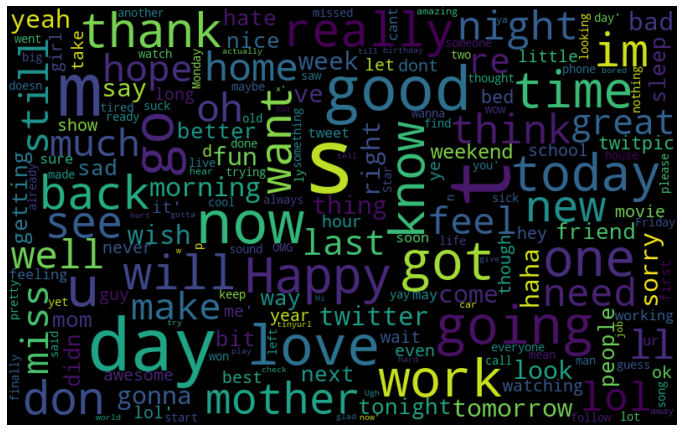

In [34]:
plt.figure(figsize=(12, 10))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## Função para nuvem de palavras negativas

In [35]:
def nuvem_palavras_neg(dados, coluna):
    texto_negativo = dados.query('sentiment_negative == 1')
    todas_palavras = ''.join([texto for texto in texto_negativo[coluna]])
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(12,10))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Função para nuvem de palavras negativas

In [36]:
def nuvem_palavras_pos(dados, coluna):
    texto_positivo = dados.query('sentiment_positive == 1')
    todas_palavras = ''.join([texto for texto in texto_positivo[coluna]])
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(12,10))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### WordCloud Negativa

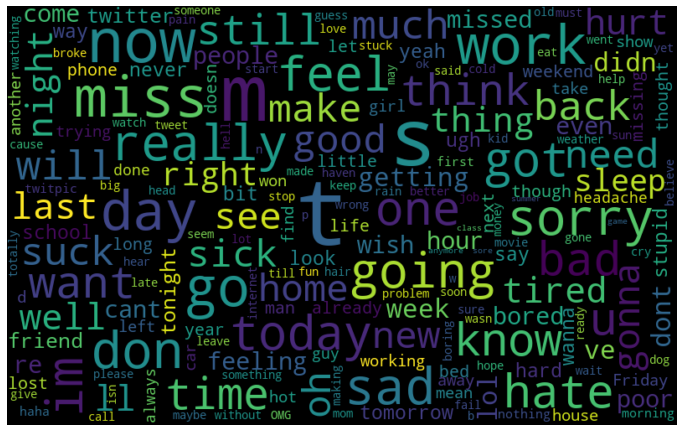

In [37]:
nuvem_palavras_neg(data_proc, 'text')

### WordCloud Positiva

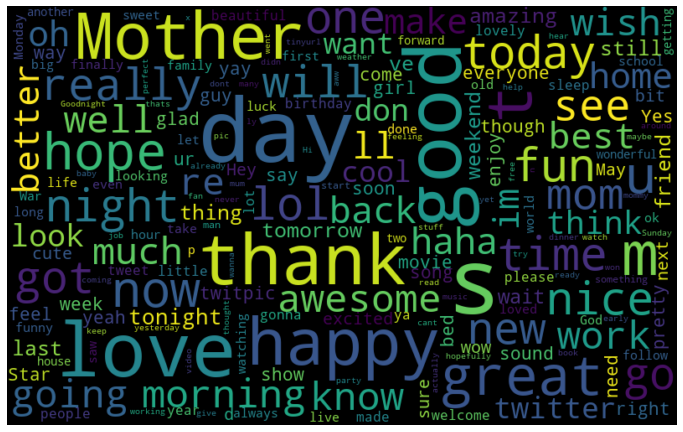

In [38]:
nuvem_palavras_pos(data_proc, 'text')

# Frequência das Palavras

In [39]:
from nltk import tokenize
import nltk

In [40]:
token_espaco = tokenize.WhitespaceTokenizer()
token_palavras = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_palavras)

In [41]:
df_frequencia = pd.DataFrame({'Palavra' : list(frequencia.keys()), 'Frequência' : list(frequencia.values())})
df_frequencia

,Palavra,Frequência
0,[',1
1,I`d,93
2,have,2368
3,responded,1
4,if,598
...,...,...
57840,"#ccnet',",1
57841,ATG,1
57842,smiles.,1
57843,Yay.,1


In [42]:
import seaborn as sns

In [43]:
def grafico(dados, coluna, quantidade):
    todas_palavras = ''.join(str([dado for dado in dados[coluna]]))
    token_palavras = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_palavras)
    df_frequencia = pd.DataFrame({'Palavra' : list(frequencia.keys()), 'Frequência' : list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = 'Frequência', n = quantidade)
    
    
    plt.figure(figsize=(12, 10))
    ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequência', color = 'crimson')
    ax.set(ylabel = 'Contagem')
    plt.show()

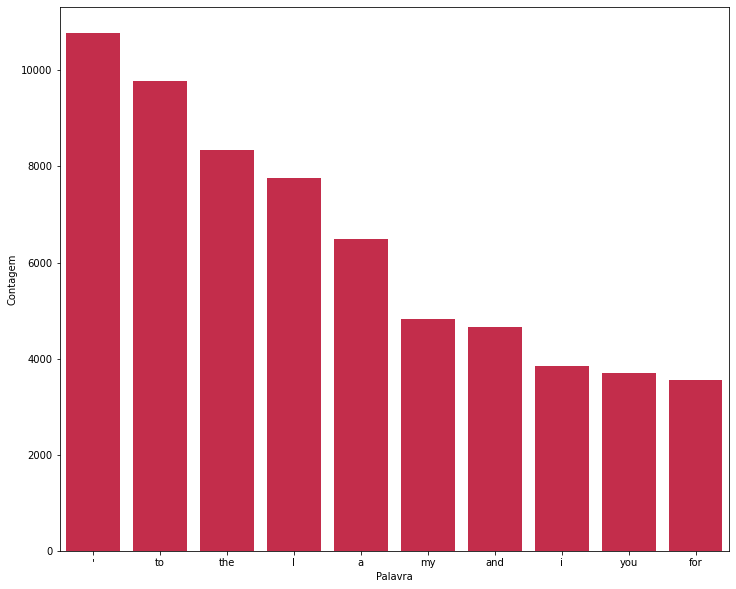

In [44]:
grafico(data_proc, 'text', 10)

# Remoção de Palavras Irrelevantes

In [45]:
palavras_irrelevantes = nltk.corpus.stopwords.words('english')
palavras_irrelevantes

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
frase_processada = list()

for opiniao in data_proc.text:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(str(opiniao))
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
data_proc['tratamento_1'] = frase_processada

In [47]:
data_proc.head()

,textID,text,selected_text,sentiment_negative,sentiment_neutral,sentiment_positive,tratamento_1
0,cb774db0d1,I`d have responded if I were going,I`d have responded if I were going,0.0,1.0,0.0,I`d responded I going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1.0,0.0,0.0,Sooo SAD I miss San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,1.0,0.0,0.0,boss bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,1.0,0.0,0.0,interview! leave alone
4,358bd9e861,Sons of **** why couldn`t they put them on t...,Sons of ****,1.0,0.0,0.0,Sons **** couldn`t put releases already bought


In [48]:
print(f"Sem tratamento: {acerto(data_proc, 'text', 'sentiment_negative')}\n")
print(f"Primeiro tratamento: {acerto(data_proc, 'tratamento_1', 'sentiment_negative')}")

Sem tratamento: 0.7131421918206957

Primeiro tratamento: 0.7295881239994179


# Remoção da Pontuação

In [49]:
from string import punctuation

In [50]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
pontuacao.append('...')
pontuacao.append('..')
pontuacao.append('://')
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '...',
 '..',
 '://']

### Adicionando as pontuações na lista de StopWords

In [52]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

In [53]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [54]:
frase_processada = list()

for opiniao in data_proc['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
data_proc['tratamento_2'] = frase_processada

In [55]:
data_proc.head()

,textID,text,selected_text,sentiment_negative,sentiment_neutral,sentiment_positive,tratamento_1,tratamento_2
0,cb774db0d1,I`d have responded if I were going,I`d have responded if I were going,0.0,1.0,0.0,I`d responded I going,I responded I going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1.0,0.0,0.0,Sooo SAD I miss San Diego!!!,Sooo SAD I miss San Diego !!!
2,088c60f138,my boss is bullying me...,bullying me,1.0,0.0,0.0,boss bullying me...,boss bullying
3,9642c003ef,what interview! leave me alone,leave me alone,1.0,0.0,0.0,interview! leave alone,interview leave alone
4,358bd9e861,Sons of **** why couldn`t they put them on t...,Sons of ****,1.0,0.0,0.0,Sons **** couldn`t put releases already bought,Sons **** put releases already bought


# Transformação do Texto em Minúsculo

In [56]:
frase_processada = list()

for opiniao in data_proc['tratamento_2']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
data_proc['tratamento_3'] = frase_processada

In [57]:
data_proc.head()

,textID,text,selected_text,sentiment_negative,sentiment_neutral,sentiment_positive,tratamento_1,tratamento_2,tratamento_3
0,cb774db0d1,I`d have responded if I were going,I`d have responded if I were going,0.0,1.0,0.0,I`d responded I going,I responded I going,responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1.0,0.0,0.0,Sooo SAD I miss San Diego!!!,Sooo SAD I miss San Diego !!!,sooo sad miss san diego !!!
2,088c60f138,my boss is bullying me...,bullying me,1.0,0.0,0.0,boss bullying me...,boss bullying,boss bullying
3,9642c003ef,what interview! leave me alone,leave me alone,1.0,0.0,0.0,interview! leave alone,interview leave alone,interview leave alone
4,358bd9e861,Sons of **** why couldn`t they put them on t...,Sons of ****,1.0,0.0,0.0,Sons **** couldn`t put releases already bought,Sons **** put releases already bought,sons **** put releases already bought


In [58]:
acuracia_tratamento_3 = acerto(data_proc, 'tratamento_3', 'sentiment_negative')
acuracia_tratamento_2 = acerto(data_proc, 'tratamento_2', 'sentiment_negative')

print(f'Acurácia 2: {acuracia_tratamento_2}')
print(f'Acurácia 3: {acuracia_tratamento_3}')

Acurácia 2: 0.7393392519283947
Acurácia 3: 0.7506913113083976


## Nuvem de Palavras Negativas do Tratamento 3

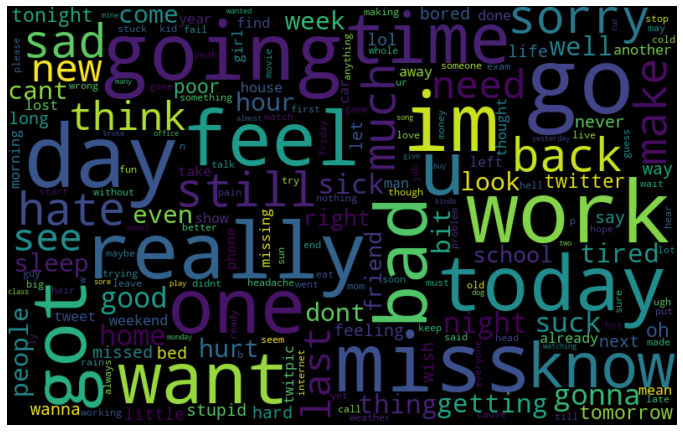

In [59]:
nuvem_palavras_neg(data_proc, 'tratamento_3')

## Nuvem de Palavras Positivas do Tratamento 3

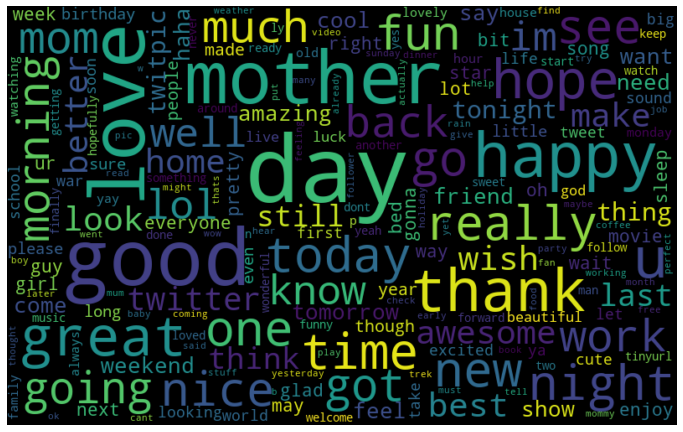

In [60]:
nuvem_palavras_pos(data_proc, 'tratamento_3')

## Gráfico das Palavras mais utilizadas no Tratamento 3

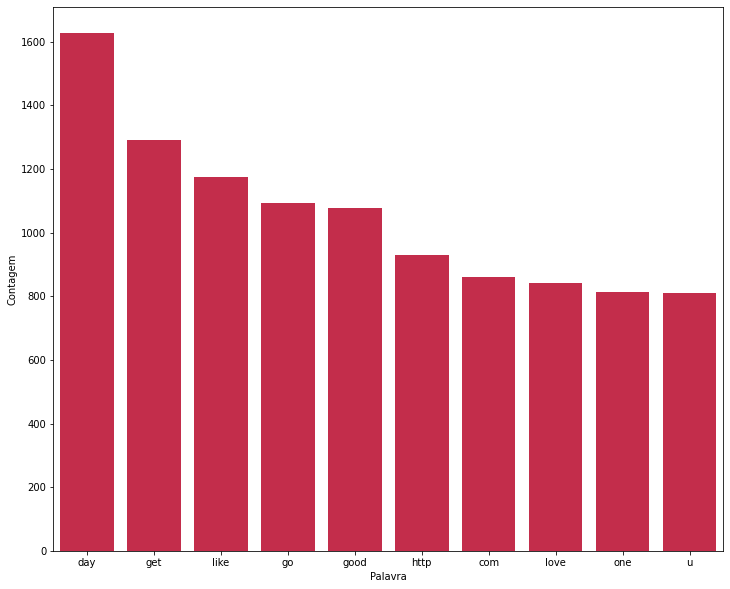

In [61]:
grafico(data_proc, 'tratamento_3', 10)

# Ngrams

[ngrams](https://kavita-ganesan.com/what-are-n-grams/#.YMANDZpKjUQ)

In [62]:
from nltk import ngrams

In [63]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(data_proc['tratamento_3'])
X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, data_proc['sentiment_negative'], random_state=50)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_train, y_train)
acuracia_tfidf_ngrams = regressao_logistica.score(X_test, y_test)

print(f'Ngrams: {acuracia_tfidf_ngrams}\n')
print(f'Tratamento 3: {acuracia_tratamento_3}')

Ngrams: 0.7864939601222529

Tratamento 3: 0.7506913113083976
